# 과제1. 직원 이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

----

## 1.가설수립

* 여기서는 가설을 생략합니다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* (옵션)자료에 대한 가정 검정.(정규성, 등분산성 등)

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) Gender --> Attrtion

① 교차표(pd.crosstab())

In [3]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data['Attrition'], data['Gender'])

Gender,Female,Male
Attrition,,
0,421,629
1,69,131


In [4]:
pd.crosstab(data['Attrition'], data['Gender'], normalize = 'all')

Gender,Female,Male
Attrition,,
0,0.3368,0.5032
1,0.0552,0.1048


② 시각화( Stacked Bar, Mosaic)

Attrition         0         1
Gender                       
Female     0.859184  0.140816
Male       0.827632  0.172368


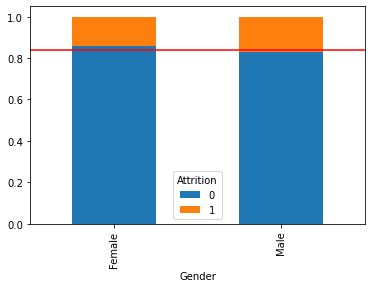

In [5]:
temp = pd.crosstab(data['Gender'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

* 비율만 비교하므로 양에 대한 비교는 할 수 없음

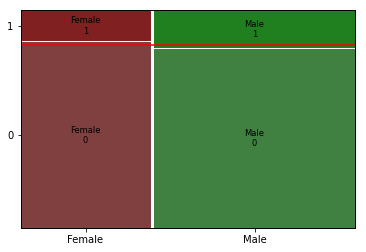

In [6]:
# Gender별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(data.sort_values(['Gender','Attrition']), ['Gender','Attrition'], gap=0.01)
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 성별이 영향을 주는 것 같아 보이지 않는다

③ 가설검정(카이제곱검정)

In [7]:
# 먼저 집계
table = pd.crosstab(data['Attrition'], data['Gender'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             421   629
1              69   131
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.9782495940105371
p-value 0.15957492990528155
기대빈도
 [[411.6 638.4]
 [ 78.4 121.6]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 가설 검정을 실행한 결과 역시 자유도가 1인 것을 기반으로 카이제곱통게량을 보았을 때 1.97정도가 나오는 것으로 보아 성별과 이직여부는 큰 관계가 없는 것으로 보임(보통 자유도의 2~3배 이상이 나오면 차이가 있는 것으로 간주)
* p value 역시 0.05이상으로 귀무가설을 기각할 정도의 확률이 아님
* 즉, 성별은 이직여부와 큰 관계가 없어 보임

#### 2) MaritalStatus --> Attrtion

① 교차표(pd.crosstab())

In [8]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data['Attrition'], data['MaritalStatus'])

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,253,501,296
1,23,69,108


In [9]:
pd.crosstab(data['Attrition'], data['MaritalStatus'], normalize = 'all')

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,0.2024,0.4008,0.2368
1,0.0184,0.0552,0.0864


② 시각화( Stacked Bar, Mosaic)

Attrition             0         1
MaritalStatus                    
Divorced       0.916667  0.083333
Married        0.878947  0.121053
Single         0.732673  0.267327


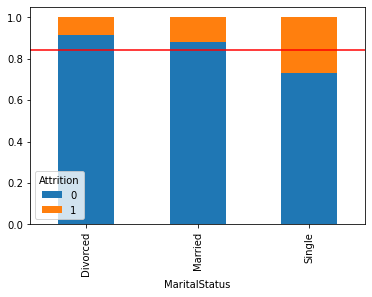

In [10]:
temp = pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

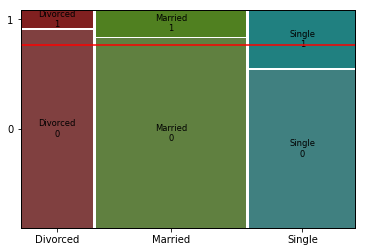

In [11]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(data.sort_values(['MaritalStatus','Attrition']), ['MaritalStatus','Attrition'], gap = .01)
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 혼자 사는 사람의 이직율을 가장 높음

③ 가설검정(카이제곱검정)

In [12]:
# 먼저 집계
table = pd.crosstab(data['Attrition'], data['MaritalStatus'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                   253      501     296
1                    23       69     108
----------------------------------------------------------------------------------------------------
카이제곱통계량 53.12935546374186
p-value 2.9047385436211595e-12
기대빈도
 [[231.84 478.8  339.36]
 [ 44.16  91.2   64.64]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 가설 검정을 실행한 결과 역시 자유도가 2인 것을 기반으로 카이제곱통게량을 보았을 때 53.12정도가 나오는 것으로 보아 결혼 여부와 이직 여부는 강한 관계가 있는 것으로 보임(보통 자유도의 2~3배 이상이 나오면 차이가 있는 것으로 간주)
* p value 역시 0에 수렴하므로 귀무가설을 기각하고 대립가설을 채택할 수준임
* 즉, 결혼 여부는 이직여부와 관계가 있어보임
#### [추측]
* 결혼을 하지 않았을 때 결혼을 한 사람보다 가정을 책임져야할 부담이 상대적으로 적기 때문에 혼자 인 사람의 이직이 높은 것으로 추측됨 
#### [추가]
* 이혼한 사람의 이직 여부가 낮은 이유가 무엇인지에 대한 추가 필요

#### 3) JobSatisfaction --> Attrtion

① 교차표(pd.crosstab())

In [13]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data['Attrition'], data['JobSatisfaction'])

JobSatisfaction,1,2,3,4
Attrition,,,,
0,197,196,308,349
1,53,39,60,48


In [14]:
pd.crosstab(data['Attrition'], data['JobSatisfaction'], normalize = 'all')

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.1576,0.1568,0.2464,0.2792
1,0.0424,0.0312,0.0480,0.0384


② 시각화( Stacked Bar, Mosaic)

Attrition               0         1
JobSatisfaction                    
1                0.788000  0.212000
2                0.834043  0.165957
3                0.836957  0.163043
4                0.879093  0.120907


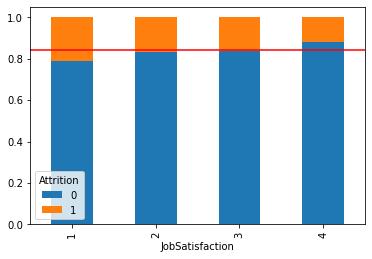

In [15]:
temp = pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

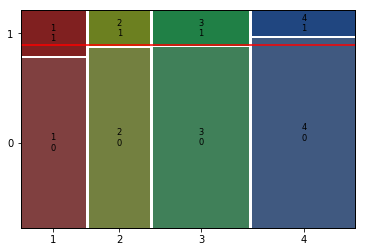

In [16]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(data.sort_values(['JobSatisfaction','Attrition']), [ 'JobSatisfaction','Attrition'], gap = .01)
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 업무 만족도가 높은 사람의 이직이 낮음
* 업무 만족도가 보통인(2~3) 사람의 이직여부가 같음
* 업무 만족도가 낮은 사람은 이직이 높음

③ 가설검정(카이제곱검정)

In [17]:
# 먼저 집계
table = pd.crosstab(data['Attrition'], data['JobSatisfaction'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 JobSatisfaction    1    2    3    4
Attrition                          
0                197  196  308  349
1                 53   39   60   48
----------------------------------------------------------------------------------------------------
카이제곱통계량 9.63151465436614
p-value 0.021972649369306214
기대빈도
 [[210.   197.4  309.12 333.48]
 [ 40.    37.6   58.88  63.52]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 가설 검정을 실행한 결과 역시 자유도가 3인 것을 기반으로 카이제곱통게량을 보았을 때 9.63정도가 나오는 것으로 보아 결혼 여부와 이직 여부는 중간 관계가 있는 것으로 보임(보통 자유도의 2~3배 이상이 나오면 차이가 있는 것으로 간주)
* p value 0.02로 기준인 0.05보다 작게 나옴 
* 즉, 직업 만족드는 이직여부와 어느 정도 관계가 있어보임

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> Attrtion


① 그래프 : histogram, densityplot

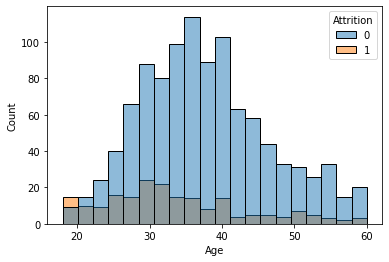

In [18]:
# histogram
sns.histplot(x='Age', data = data, hue = 'Attrition', bins = 20)
plt.show()

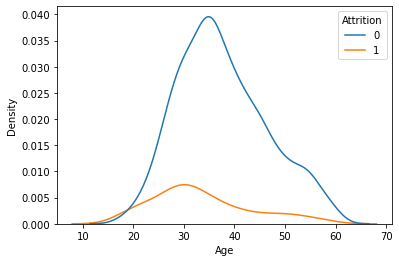

In [19]:
# densityplot
sns.kdeplot(x='Age', data = data, hue = 'Attrition')
plt.show()

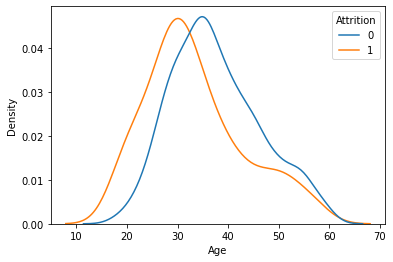

In [20]:
# sns.kdeplot(  , hue = , common_norm = False )
sns.kdeplot(x='Age', data = data, hue = 'Attrition', common_norm = False)
plt.show()

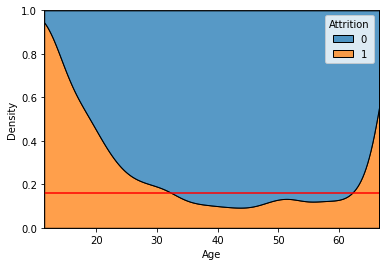

In [21]:
sns.kdeplot(x='Age', data = data, hue = 'Attrition', multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 10~20대의 이직율이 높음
* 30대 초반~40대의 이직율이 낮아지는 형태이고
* 50대 부터 약간 이직율이 다시 높아져서
* 60대 이후로 이직율이 다시 올라가는 것으로 보임

② 수치화 : 로지스틱회귀

In [22]:
model = sm.Logit(data['Attrition'], data['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.424660
         Iterations 5
Age    4.667821e-100
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> p value가 0에 수렴하는 결과가 나온 것으로 보아 나이와 이직 여부는 관계가 있는 것으로 보임

#### 2) DistanceFromHome --> Attrtion


In [23]:
data.isna().sum()

Attrition                    0
Age                          0
DistanceFromHome            54
Gender                       0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
dtype: int64

* 집과의 거리 관련 데이터에 결측치 있음 

In [24]:
# 데이터프레임 복사
data_test = data.copy()

# DistanceFromHome 평균 구하기
# mean()은 NaN은 다빼고 있는 것끼리의 평균
mean_Distancefromhome = data_test['DistanceFromHome'].mean()

# 결측치를 평균값으로 채우기
data_test['DistanceFromHome'].fillna(mean_Distancefromhome, inplace=True)

# 확인
data_test.isna().sum()

Attrition                    0
Age                          0
DistanceFromHome             0
Gender                       0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
dtype: int64

① 그래프 : histogram, densityplot

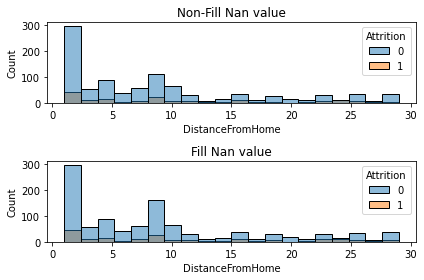

In [25]:
# histogram
plt.subplot(2,1,1) # 옆으로(1행 1열)
sns.histplot(x='DistanceFromHome', data = data, hue = 'Attrition', bins = 20)
plt.title("Non-Fill Nan value")

plt.subplot(2,1,2) # 옆으로(1행 2열)
sns.histplot(x='DistanceFromHome', data = data_test, hue = 'Attrition', bins = 20)
plt.title("Fill Nan value")

plt.tight_layout() # 그래프 간 간격을 적절히 맞추기
plt.show()

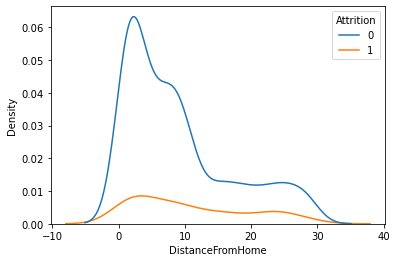

In [26]:
# densityplot
sns.kdeplot(x='DistanceFromHome', data = data, hue = 'Attrition')
plt.show()

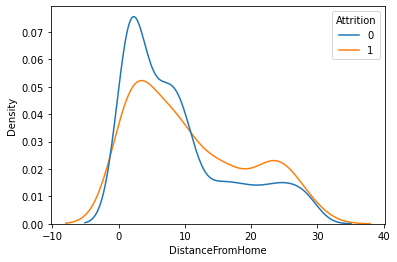

In [27]:
# sns.kdeplot(  , hue = , common_norm = False )
sns.kdeplot(x='DistanceFromHome', data = data, hue = 'Attrition', common_norm = False)
plt.show()

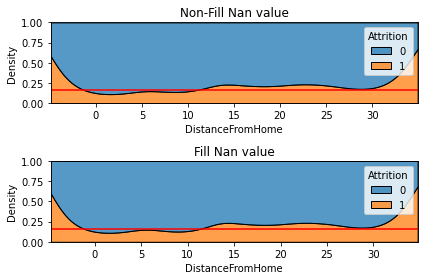

In [28]:
# histogram
plt.subplot(2,1,1) # 옆으로(1행 1열)
sns.kdeplot(x='DistanceFromHome', data = data, hue = 'Attrition', multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.title("Non-Fill Nan value")

plt.subplot(2,1,2) # 옆으로(1행 2열)
sns.kdeplot(x='DistanceFromHome', data = data_test, hue = 'Attrition', multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.title("Fill Nan value")

plt.tight_layout() # 그래프 간 간격을 적절히 맞추기
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

② 수치화 : 로지스틱회귀

In [29]:
model = sm.Logit(data_test['Attrition'], data_test['DistanceFromHome'])
result = model.fit()5.890702e-48
print(result.pvalues)

SyntaxError: invalid syntax (<ipython-input-29-efd1d97a5e78>, line 2)

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 결론 : p 값이 0에 수렴하나 로지스틱 회귀로 판정하는 것은 미봉책.
그러므로, 그래프 관점에서, 중간 정도의 관계로 볼수 있음
### [추가]
* 통근거리를  범주화해서 볼 필요가 있어보임

#### 3) MonthlyIncome --> Attrtion


① 그래프 : histogram, densityplot

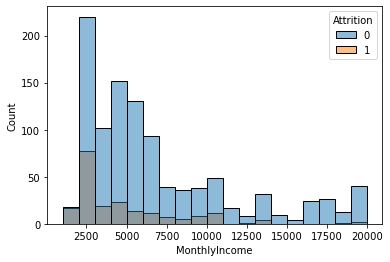

In [42]:
sns.histplot(x='MonthlyIncome', data = data, hue = 'Attrition')
plt.show()

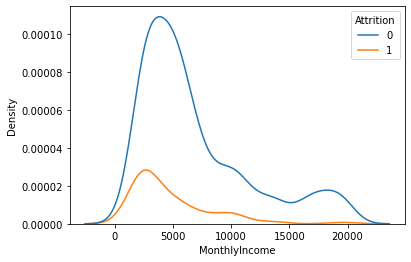

In [43]:
# densityplot
sns.kdeplot(x='MonthlyIncome', data = data, hue = 'Attrition')
plt.show()

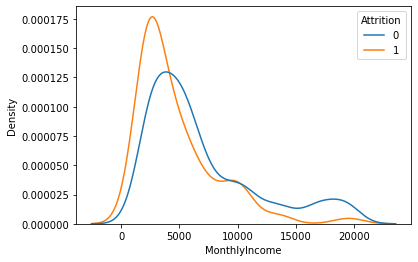

In [44]:
sns.kdeplot(x='MonthlyIncome', data = data, hue ='Attrition', common_norm = False)
plt.show()

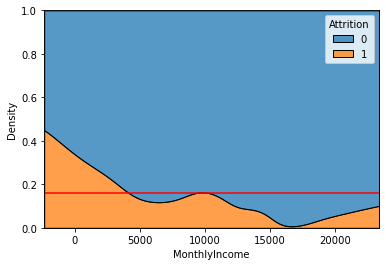

In [45]:
sns.kdeplot(x='MonthlyIncome', data = data, hue ='Attrition', multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 0~5000달러 사이에서 이직이 높은 것으로 확인됨
* 10000달러 이후부터는 이직여부가 낮은 것으로 보임
### [추가]
* 사람들이 생각하는 적정 월 수입이 있는 것으로 보임 그 수입 이상일 경우 월 수입으로 인해 이직을 결정하지 않는 것 같음

② 수치화 : 로지스틱회귀

In [46]:
model = sm.Logit(data_test['Attrition'], data_test['MonthlyIncome'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.437401
         Iterations 6
MonthlyIncome    1.922717e-71
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> p value가 0에 수렴하는 결과가 나온 것으로 보아 월 수입과 이직 여부는 약간의 관계가 있는 것으로 보임 

#### 4) DistanceFromHome_class --> Attrtion


In [33]:
bins = [0, 10, 20, 30, np.inf]
labels = ['0~10mile', '10~20mile', '20~30mile', ' 30mile~']
data_test['DistanceFromHome_class'] = pd.cut(data_test['DistanceFromHome'], bins=bins, labels=labels, include_lowest=True)
data_test[['DistanceFromHome', 'DistanceFromHome_class','Attrition']].head(5)

,DistanceFromHome,DistanceFromHome_class,Attrition
0,7.000000,0~10mile,0
1,18.000000,10~20mile,0
2,6.000000,0~10mile,0
3,2.000000,0~10mile,0
4,9.258361,0~10mile,0


① 그래프 : histogram, densityplot

In [34]:
data_test['DistanceFromHome_class'].value_counts()

0~10mile     887
10~20mile    190
20~30mile    173
 30mile~       0
Name: DistanceFromHome_class, dtype: int64

In [32]:
data['DistanceFromHome_class'].value_counts() / data['DistanceFromHome_class'].shape[0]

KeyError: 'DistanceFromHome_class'

DistanceFromHome_class과 Attriton의 관계 시각화 : 평균 비교 barplot, boxplot 


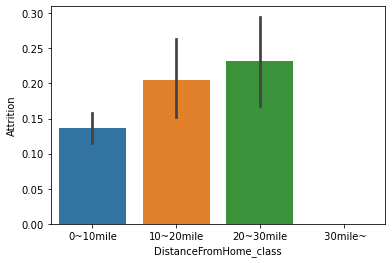

In [35]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x="DistanceFromHome_class", y="Attrition", data=data_test)
plt.show()

In [40]:
D_1 = data_test.loc[data_test.DistanceFromHome_class == '0~10mile', 'Attrition']
D_2 = data_test.loc[data_test.DistanceFromHome_class== '10~20mile', 'Attrition']
D_3 = data_test.loc[data_test.DistanceFromHome_class== '20~30mile', 'Attrition']

In [41]:
spst.f_oneway(D_1, D_2, D_3)

F_onewayResult(statistic=6.601129769615801, pvalue=0.0014068098305367726)

> 분산 분석 결과 P value가 0인 것으로 보아 범주화한 통근 거리는 이직여부와 강한 관계가 있는 것으로 보임

## 4.관계 정리

### 1) 강한관계의 변수

결혼 여부, 통근 범주화, 나이, 월급, 거리

### 2) 중간관계의 변수

직업 만족도

### 3) (거의)관계 없음

성별

## 5. 추가 분석

### 1) 분석1

> 원래 통근 거리 데이터보다 통근을 범주화했을 때 더 강한 관계를 가지는 것으로 확인 됨